In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cyber.csv')

In [4]:
states = list(set(df['State'].to_list()))
states
states.sort()
states

['Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Delhi',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [5]:
one_state = df[df['State'] == 'Andhra Pradesh']

In [6]:
one_state

,Unique Code,State,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions,Cases Reported
0,1,Andhra Pradesh,2014,52143763,17630000.0,4790000.0,15790000.0,282
1,1,Andhra Pradesh,2015,52229924,22100000.0,7530000.0,20060000.0,536
2,1,Andhra Pradesh,2016,52364112,24870000.0,11180000.0,22720000.0,616
3,1,Andhra Pradesh,2017,52375124,31800000.0,21070000.0,29490000.0,931
4,1,Andhra Pradesh,2018,50901123,37610000.0,32060000.0,35260000.0,1207
5,1,Andhra Pradesh,2019,53903393,49290000.0,44260000.0,46810000.0,1886
6,1,Andhra Pradesh,2020,87641369,58650000.0,54760000.0,56060000.0,1899


<AxesSubplot:xlabel='Year', ylabel='Cases Reported'>

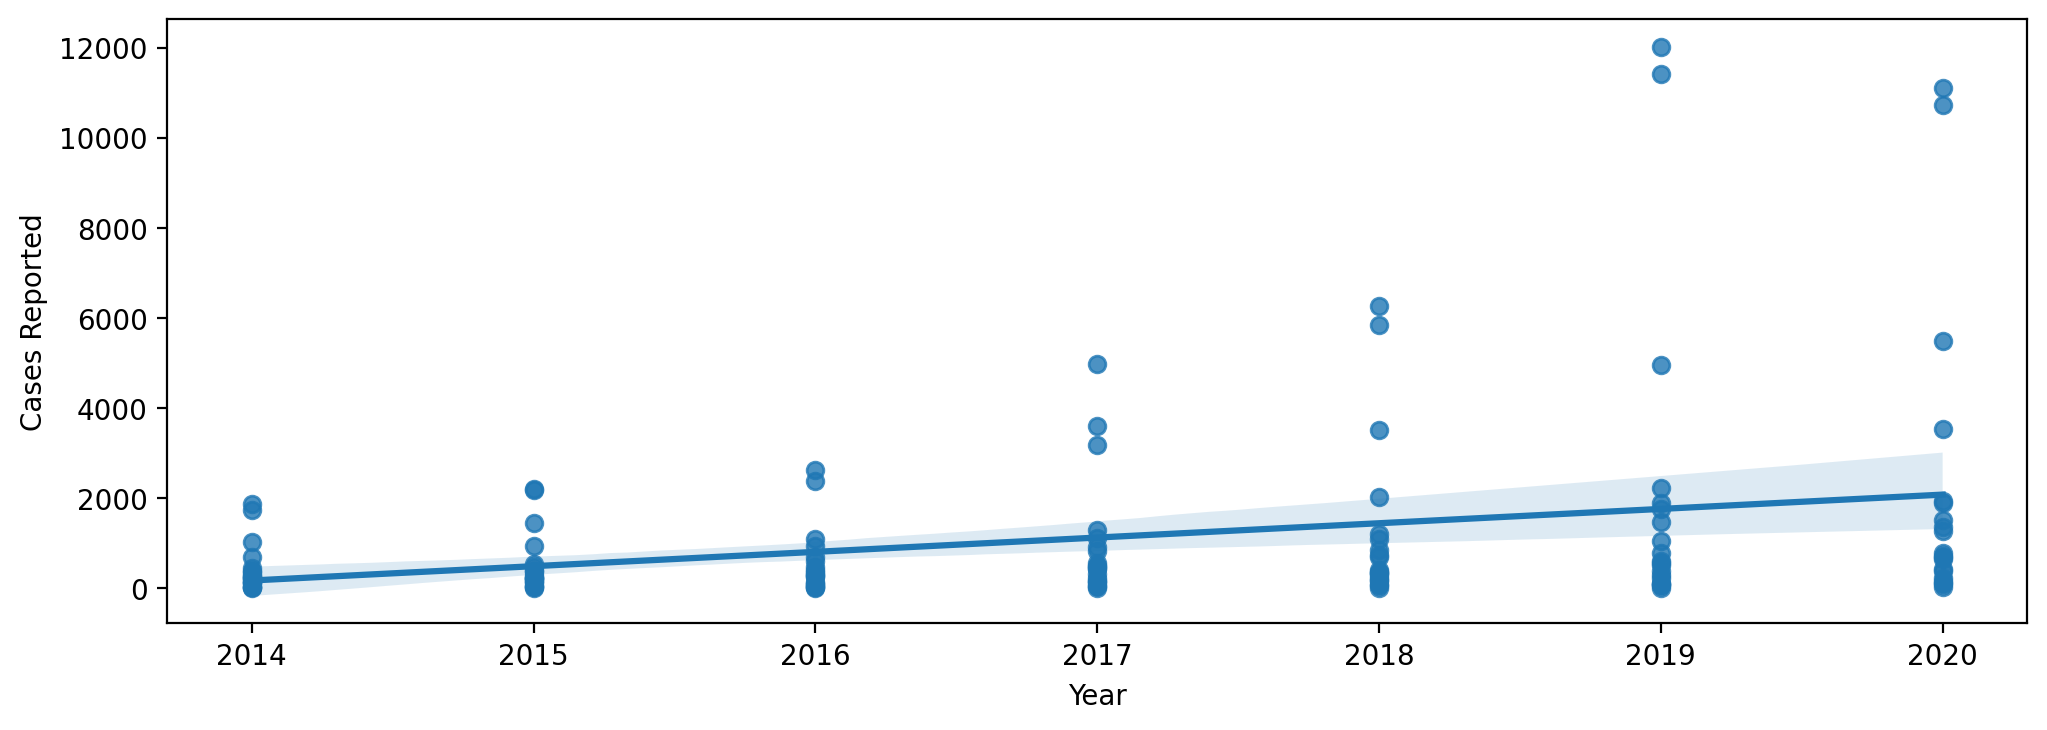

In [7]:
plt.figure(figsize=(12,4), dpi=200, alpha=0.5)
sns.regplot(data=df, x='Year', y='Cases Reported')

<AxesSubplot:xlabel='Year', ylabel='Cases Reported'>

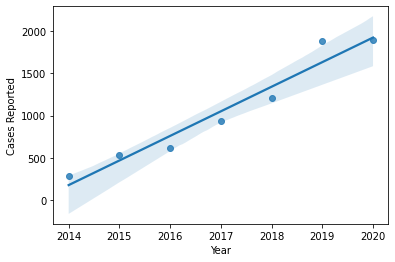

In [8]:
sns.regplot(data=one_state,x='Year',y='Cases Reported')

Importing SCIKIT-LEARN

In [9]:
X = one_state.drop(['Unique Code', 'State', 'Cases Reported'], axis=1)
y = one_state['Cases Reported']

In [10]:
X

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
0,2014,52143763,17630000.0,4790000.0,15790000.0
1,2015,52229924,22100000.0,7530000.0,20060000.0
2,2016,52364112,24870000.0,11180000.0,22720000.0
3,2017,52375124,31800000.0,21070000.0,29490000.0
4,2018,50901123,37610000.0,32060000.0,35260000.0
5,2019,53903393,49290000.0,44260000.0,46810000.0
6,2020,87641369,58650000.0,54760000.0,56060000.0


In [47]:
y

0     282
1     536
2     616
3     931
4    1207
5    1886
6    1899
Name: Cases Reported, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [14]:
X_train

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
5,2019,53903393,49290000.0,44260000.0,46810000.0
6,2020,87641369,58650000.0,54760000.0,56060000.0
2,2016,52364112,24870000.0,11180000.0,22720000.0
4,2018,50901123,37610000.0,32060000.0,35260000.0


In [15]:
X_test

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
3,2017,52375124,31800000.0,21070000.0,29490000.0
0,2014,52143763,17630000.0,4790000.0,15790000.0
1,2015,52229924,22100000.0,7530000.0,20060000.0


In [16]:
my_model = LinearRegression()
my_model.fit(X_train, y_train)

LinearRegression()

In [17]:
predictions = my_model.predict(X_test)

In [18]:
predictions

array([965.36022598, 144.52987187, 471.66272055])

In [19]:
y_test

3    931
0    282
1    536
Name: Cases Reported, dtype: int64

Error Metrices

In [20]:
mean_cases = y.mean()

In [21]:
mean_cases

1051.0

<AxesSubplot:xlabel='Cases Reported', ylabel='Count'>

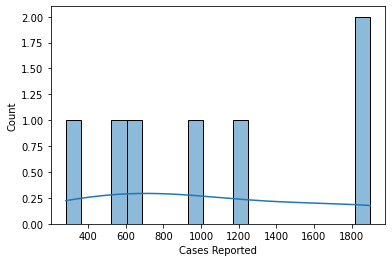

In [22]:
sns.histplot(data=one_state, x='Cases Reported', bins=20, kde=True)

In [23]:
mae = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [24]:
mean_cases, mae, rmse

(1051.0, 78.72254452065386, 89.84792111209998)

Test Residuals

In [25]:
residuals = y_test - predictions

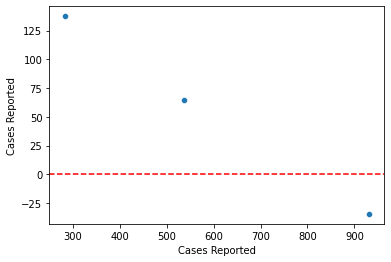

In [26]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', ls='--')

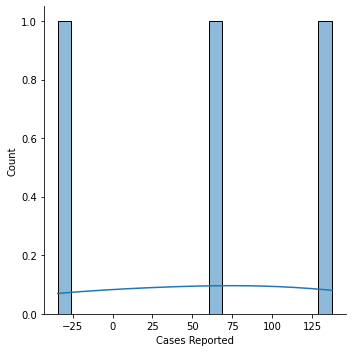

In [27]:
sns.displot(residuals, bins=20, kde=True)

Deployment

In [28]:
final_model = LinearRegression()
final_model.fit(X.values,y.values)

LinearRegression()

In [29]:
X

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
0,2014,52143763,17630000.0,4790000.0,15790000.0
1,2015,52229924,22100000.0,7530000.0,20060000.0
2,2016,52364112,24870000.0,11180000.0,22720000.0
3,2017,52375124,31800000.0,21070000.0,29490000.0
4,2018,50901123,37610000.0,32060000.0,35260000.0
5,2019,53903393,49290000.0,44260000.0,46810000.0
6,2020,87641369,58650000.0,54760000.0,56060000.0


In [30]:
y

0     282
1     536
2     616
3     931
4    1207
5    1886
6    1899
Name: Cases Reported, dtype: int64

In [31]:
final_model.coef_

array([-3.00906500e+01, -1.63456024e-05, -3.73523230e-04, -2.48830917e-05,
        4.70272223e-04])

In [32]:
predicted_crimes = final_model.predict(X.values)
predicted_crimes

array([ 286.9313093 ,  525.66618654,  618.82363287,  937.68617071,
       1201.52453494, 1887.67909803, 1898.68906762])

In [33]:
y

0     282
1     536
2     616
3     931
4    1207
5    1886
6    1899
Name: Cases Reported, dtype: int64

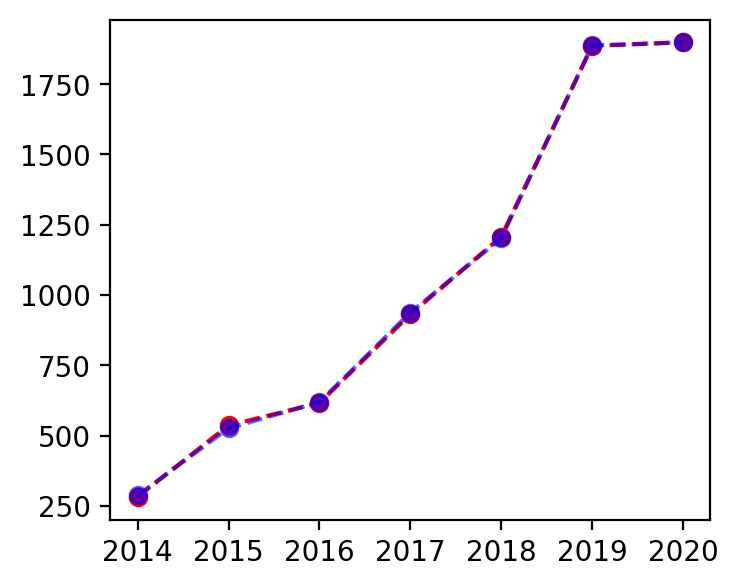

In [34]:
fig = plt.figure(figsize=(6,5), dpi=200)
axes = fig.add_axes([0,0,0.5,0.5])
axes.plot(one_state['Year'], one_state['Cases Reported'], 'o', color='red', linestyle='dashed');
axes.plot(one_state['Year'], predicted_crimes, 'o', color='blue', linestyle='dashed', alpha=0.6);

In [35]:
one_state.head()

,Unique Code,State,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions,Cases Reported
0,1,Andhra Pradesh,2014,52143763,17630000.0,4790000.0,15790000.0,282
1,1,Andhra Pradesh,2015,52229924,22100000.0,7530000.0,20060000.0,536
2,1,Andhra Pradesh,2016,52364112,24870000.0,11180000.0,22720000.0,616
3,1,Andhra Pradesh,2017,52375124,31800000.0,21070000.0,29490000.0,931
4,1,Andhra Pradesh,2018,50901123,37610000.0,32060000.0,35260000.0,1207


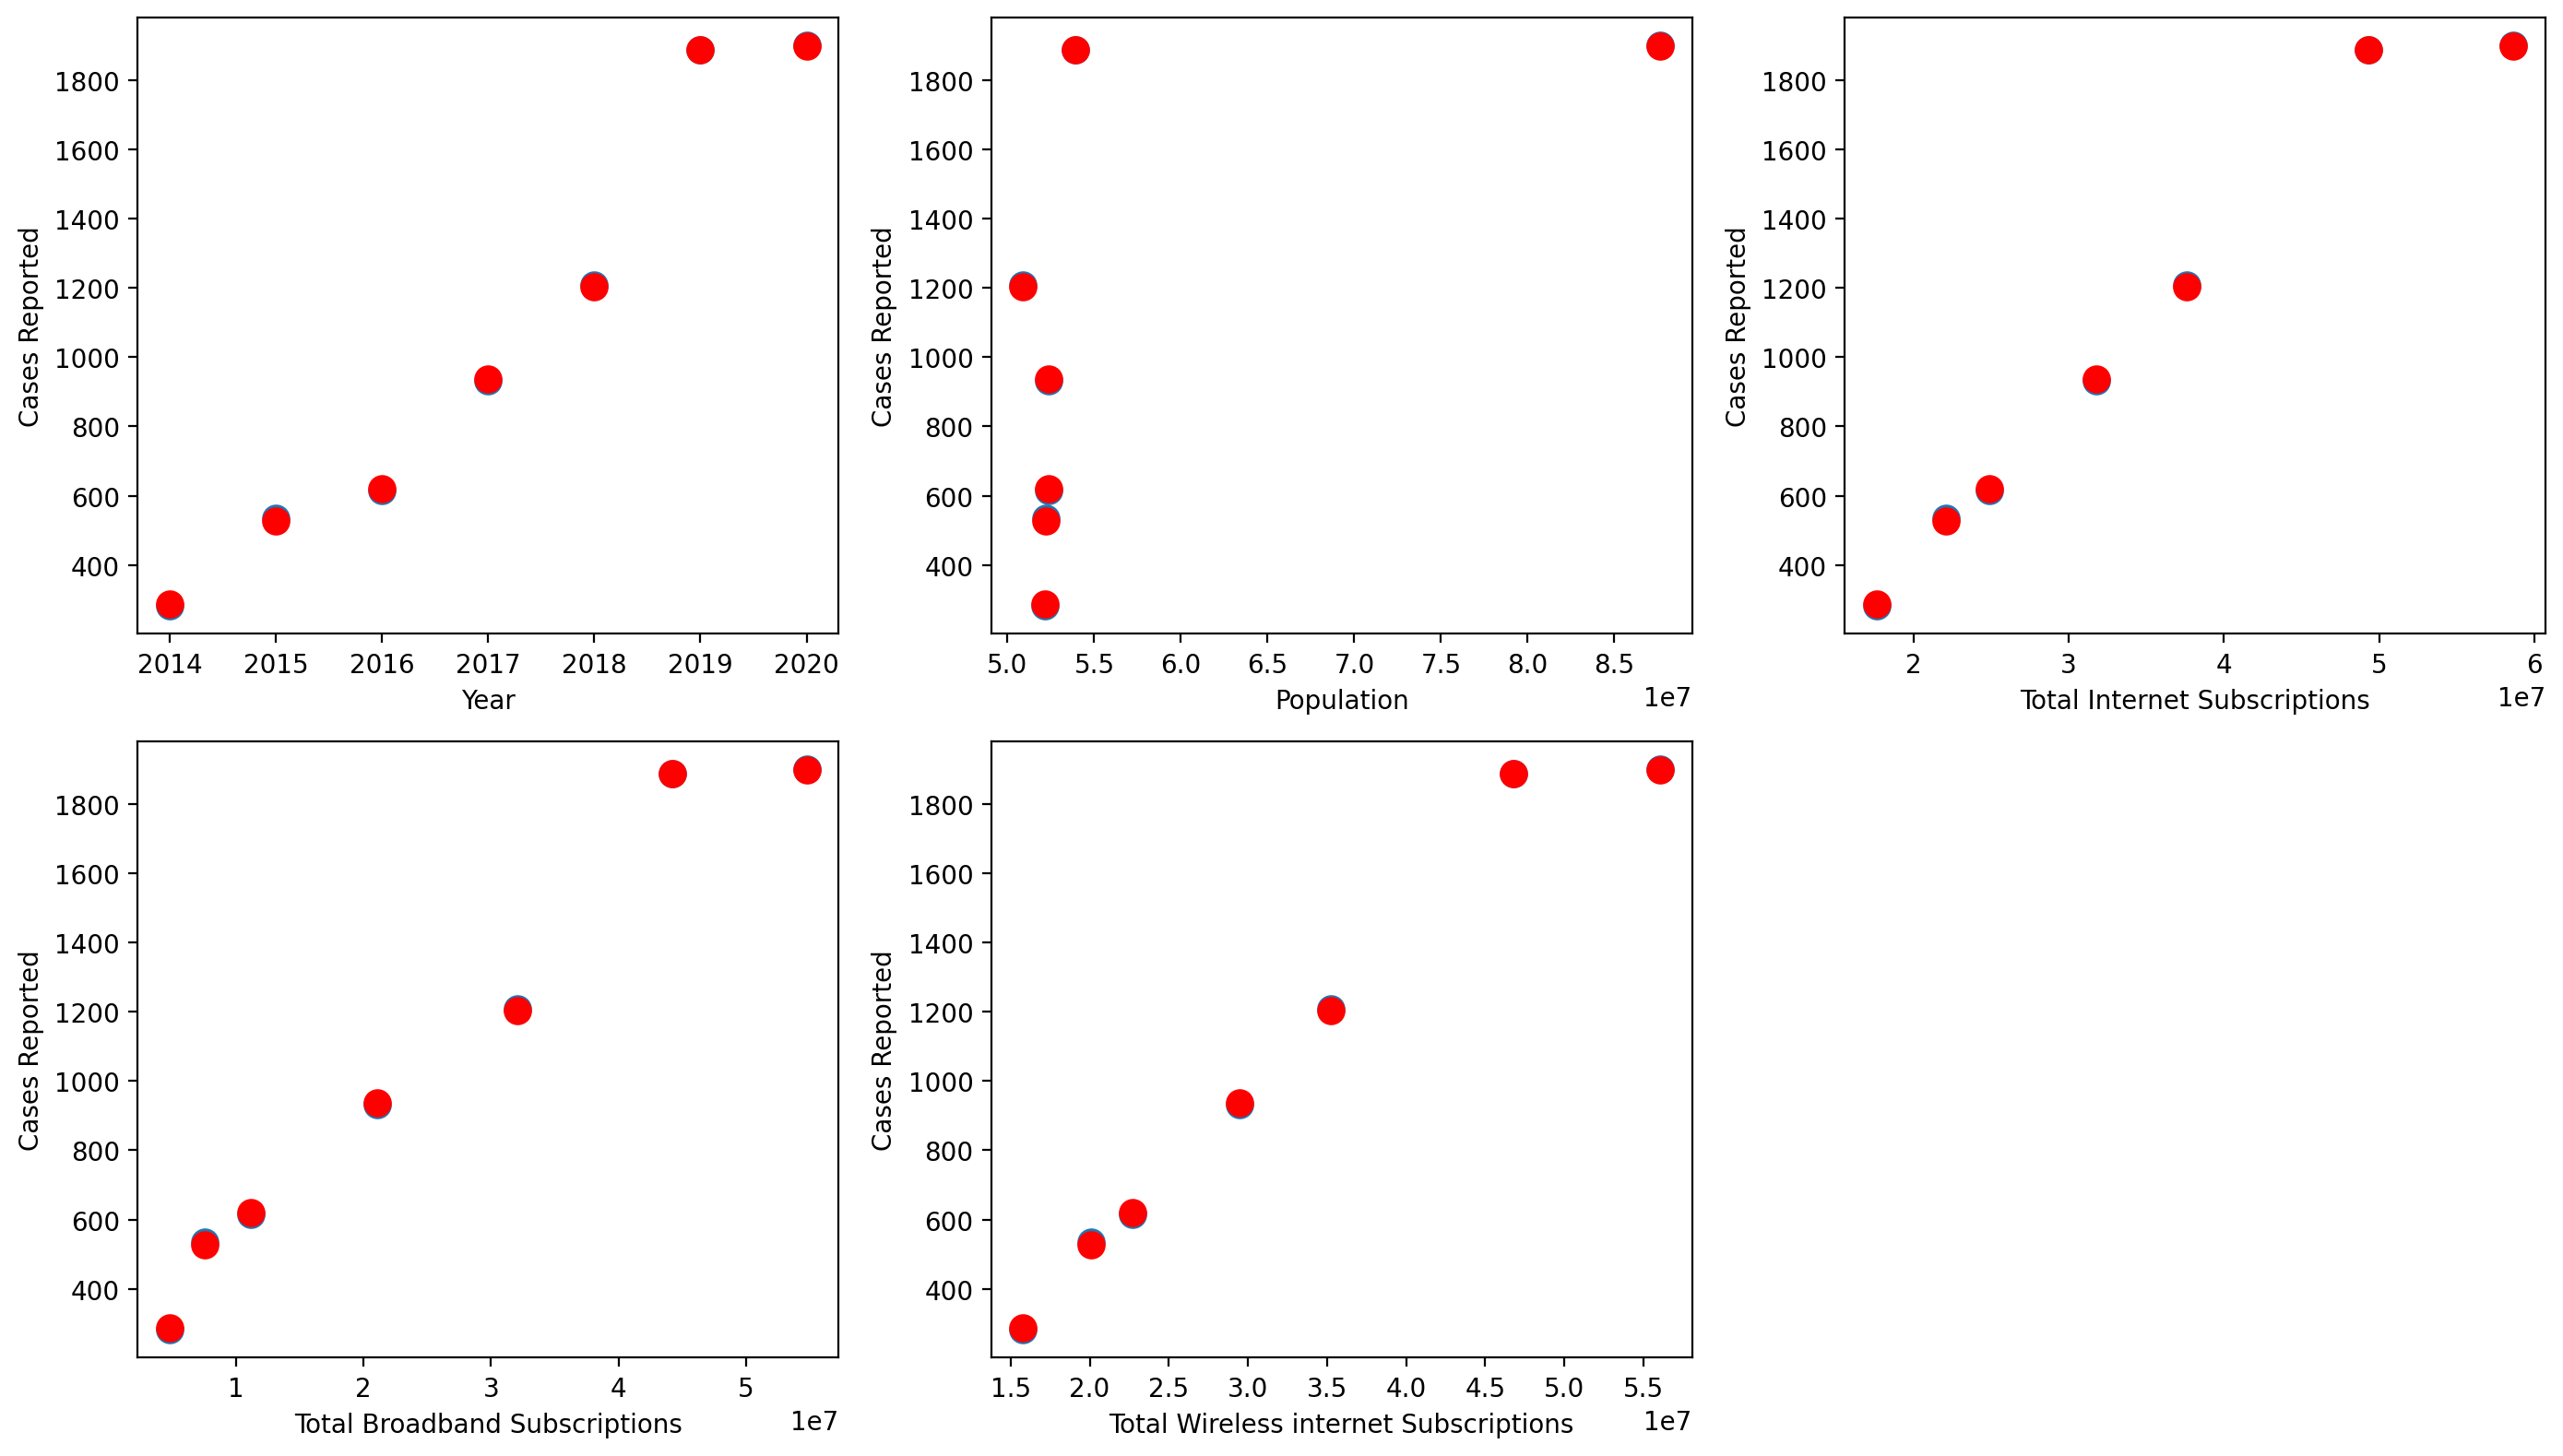

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8), dpi=200)

axes[0,0].plot(one_state['Year'], one_state['Cases Reported'], 'o',  markersize=10)
axes[0,0].plot(one_state['Year'], predicted_crimes, 'o', color='red', markersize=10)
axes[0,0].set_ylabel('Cases Reported')
axes[0,0].set_xlabel('Year')

axes[0,1].plot(one_state['Population'], one_state['Cases Reported'], 'o', markersize=10)
axes[0,1].plot(one_state['Population'], predicted_crimes, 'o', color='red', markersize=10)
axes[0,1].set_ylabel('Cases Reported')
axes[0,1].set_xlabel('Population')

axes[0,2].plot(one_state['Total Internet Subscriptions'], one_state['Cases Reported'], 'o', markersize=10)
axes[0,2].plot(one_state['Total Internet Subscriptions'], predicted_crimes, 'o', color='red', markersize=10)
axes[0,2].set_ylabel('Cases Reported')
axes[0,2].set_xlabel('Total Internet Subscriptions')

axes[1,0].plot(one_state['Total Broadband Subscriptions'], one_state['Cases Reported'], 'o', markersize=10)
axes[1,0].plot(one_state['Total Broadband Subscriptions'], predicted_crimes, 'o', color='red', markersize=10)
axes[1,0].set_ylabel('Cases Reported')
axes[1,0].set_xlabel('Total Broadband Subscriptions')

axes[1,1].plot(one_state['Total Wireless internet Subscriptions'], one_state['Cases Reported'], 'o', markersize=10)
axes[1,1].plot(one_state['Total Wireless internet Subscriptions'], predicted_crimes, 'o', color='red', markersize=10)
axes[1,1].set_ylabel('Cases Reported')
axes[1,1].set_xlabel('Total Wireless internet Subscriptions')

fig.delaxes(axes[1,2])

plt.tight_layout()

Exporting and Importing

In [37]:
from joblib import dump, load

In [38]:
dump(final_model, 'saved_model.joblib')

['saved_model.joblib']

In [39]:
loaded_model = load('saved_model.joblib')

In [40]:
loaded_model.coef_

array([-3.00906500e+01, -1.63456024e-05, -3.73523230e-04, -2.48830917e-05,
        4.70272223e-04])

In [41]:
X.shape

(7, 5)

In [42]:
X

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
0,2014,52143763,17630000.0,4790000.0,15790000.0
1,2015,52229924,22100000.0,7530000.0,20060000.0
2,2016,52364112,24870000.0,11180000.0,22720000.0
3,2017,52375124,31800000.0,21070000.0,29490000.0
4,2018,50901123,37610000.0,32060000.0,35260000.0
5,2019,53903393,49290000.0,44260000.0,46810000.0
6,2020,87641369,58650000.0,54760000.0,56060000.0


In [43]:
y

0     282
1     536
2     616
3     931
4    1207
5    1886
6    1899
Name: Cases Reported, dtype: int64

In [44]:
sample_input = [[2022,90000000,60000000, 57000000, 59000000]]

In [45]:
loaded_model.predict(sample_input)

array([2622.56037181])